In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import skimage 
from skimage import io, filters

In [4]:
fname = "D:\CF_22_2_17\CF_%04d.jpg"
#fname = "/Users/timrudge/RaspiScope/timelapse/timlap_3_%04d.jpg"
fname%(701)

'D:\\CF_22_2_17\\CF_0701.jpg'

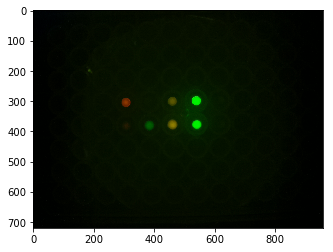

In [5]:
im = plt.imread(fname%500)
plt.imshow(im)

In [6]:
im.shape
w,h,_ = im.shape

In [18]:
nt = 606
ims = np.zeros((w,h,nt))
for i in range(nt):
    im = plt.imread(fname%i)
    ims[:,:,i] = im[:,:,1]

In [19]:
ims.shape

(720, 960, 606)

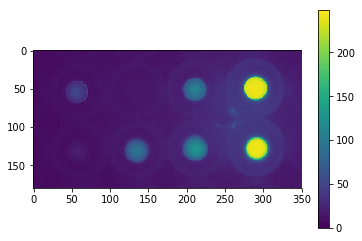

In [66]:
plt.imshow(ims[:,:,-1])
plt.colorbar()
imssub = ims[250:430,250:600,:] #only the center of the images
plt.imshow(imssub[:,:,-1])

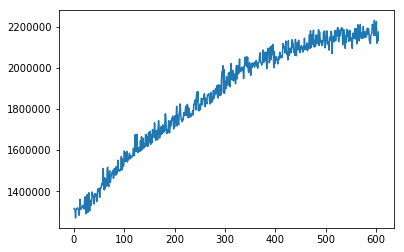

In [67]:
sumims = imssub.sum(axis=(0,1))
sumims.shape
plt.plot(sumims) # To see if the total signal growth in time

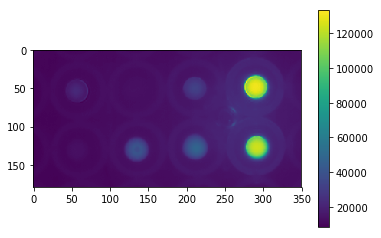

In [89]:
ims_sum = imssub.sum(axis=2)
fig=plt.figure()
plt.imshow(ims_sum)
plt.colorbar()  # sum over time on each pixel
fig.savefig('CF_plots\sum_intensity_plate.tif')

In [23]:
from skimage.filters import gaussian
simsub = gaussian(ims_sum, 2)
nsimsub = (simsub-simsub.min())/(simsub.max()-simsub.min())

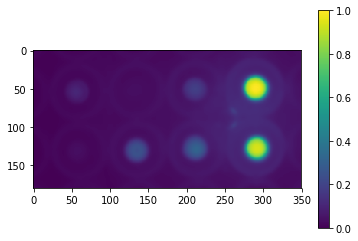

In [24]:
plt.imshow(nsimsub)
plt.colorbar() # smooth image

In [43]:
import skimage.feature as skfeat
A = skfeat.blob_log(nsimsub, min_sigma=1.0, max_sigma=10.0, num_sigma=100, threshold=0.04, overlap=0.8)

In [44]:
A.shape
#A[1:10,:]

(6, 3)

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


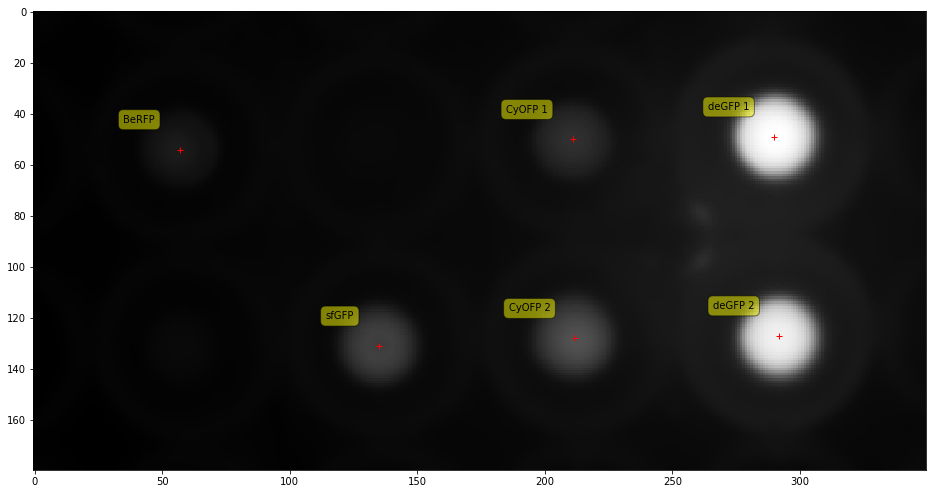

In [74]:
fig=plt.figure(figsize=(16,12))
plt.imshow(nsimsub, cmap='gray')
plt.hold(True)
#labels = ['sample {0}'.format(i) for i in range(len(A))]
labels=['deGFP 1','CyOFP 1','BeRFP','deGFP 2','CyOFP 2', 'sfGFP']
for i in range(len(A)):
    plt.plot(A[i,1],A[i,0],'r+')
    plt.annotate(
        labels[i],
        xy=(A[i,1], A[i,0]), xytext=(-25, 25),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
fig.savefig('graySamples.tif')

In [87]:
timex=np.arange(0,nt*2.5,2.5)
timex=timex/60
print(len(timex))
print(imssub.shape)

606
(180, 350, 606)


C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(131.0, 135.0, 19.636363636363637)

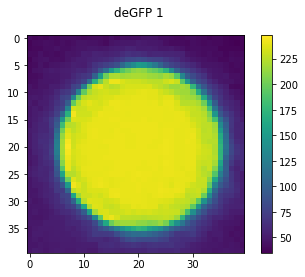

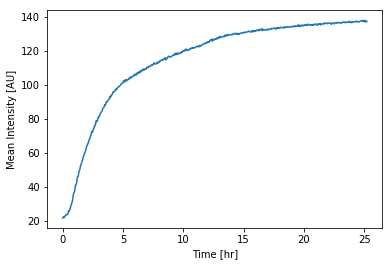

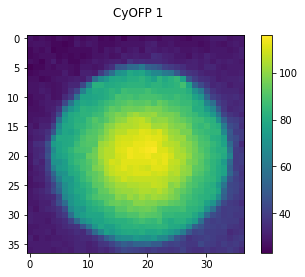

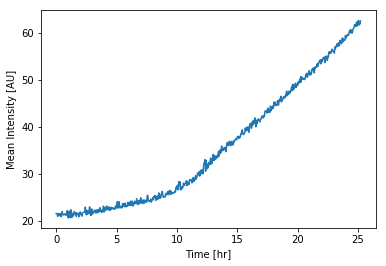

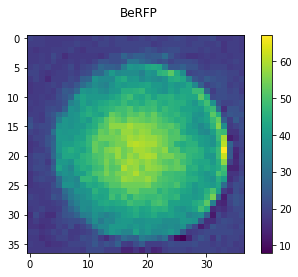

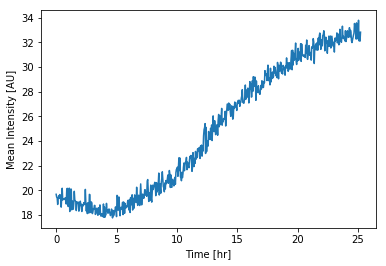

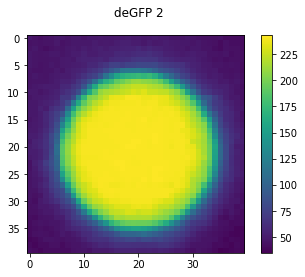

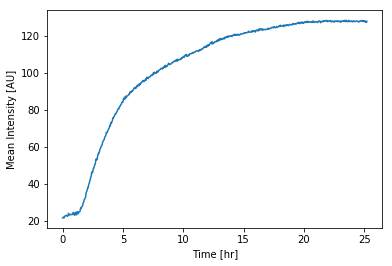

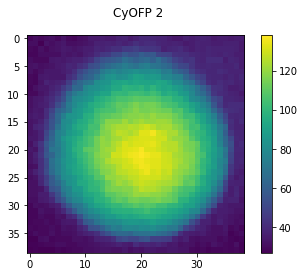

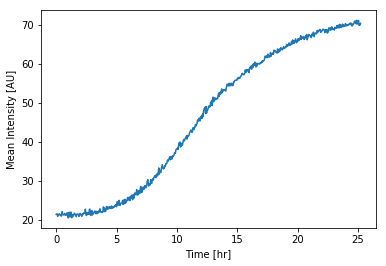

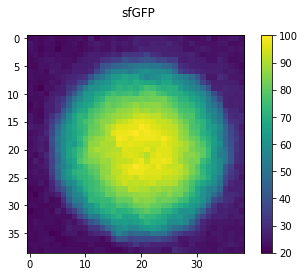

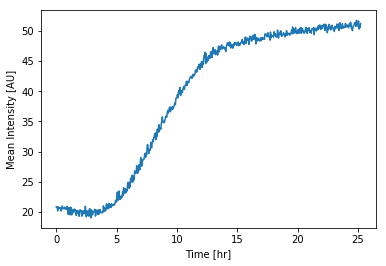

In [88]:
for i in range(len(A)):
    x = A[i,0]
    y = A[i,1]
    r = 2*A[i,2]
    roi = imssub[x-r:x+r,y-r:y+r,:]  # region of interest around each colony
    fig= plt.figure()
    plt.imshow(roi[:,:,-1], interpolation='none')
    plt.colorbar()
    fig.suptitle(labels[i])
    fig.savefig('CF_plots\circle_'+labels[i]+'.tif')
    fig2=plt.figure()
    plt.plot(timex,roi.mean(axis=(0,1)))
    plt.ylabel('Mean Intensity [AU]')
    plt.xlabel('Time [hr]')
    fig.savefig('CF_plots\intensity_'+labels[i]+'.tif')
x,y,r

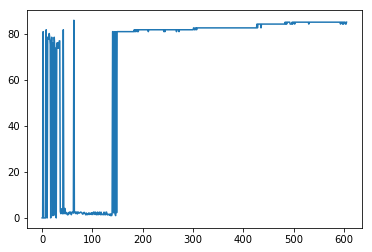

In [55]:
R = np.zeros((nt,))
for i in range(nt):
    roi200 = roi[:,:,i].astype(np.float32)
    nroi200 = (roi200-roi200.min())/(roi200.max()-roi200.min())
    AA = skfeat.blob_log(nroi200, min_sigma=1.0, max_sigma=10.0, num_sigma=200, threshold=0.25, overlap=0.8)
    if len(AA)>0:
        R[i] = AA[0,2]
'''
print AA
plt.imshow(roi200, interpolation='none')
plt.figure()
plt.plot(roi200[7,:])
'''
plt.plot(R*R)

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use labe

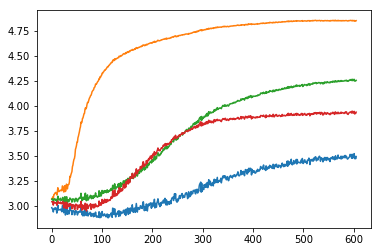

In [65]:
for i in range(2,len(A)):
    x = A[i,0]
    y = A[i,1]
    r = 2*A[i,2]
    roi = imssub[x-r:x+r,y-r:y+r,:]
    plt.plot(np.log(roi.mean(axis=(0,1))))
    plt.hold(True)
plt.legend()

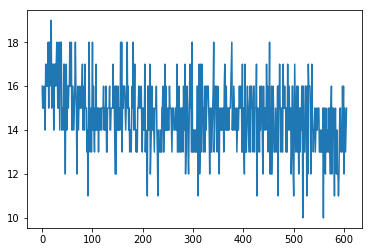

In [49]:
plt.plot(ims[500,200,:])

In [50]:
plt.figure(figsize=(16,12))
plt.imshow(ims[A[10,0],400:450,:])

IndexError: index 10 is out of bounds for axis 0 with size 6

In [51]:
s = np.diff(ims[A[10,0],:,:], axis=1)
s.shape

IndexError: index 10 is out of bounds for axis 0 with size 6

In [52]:
c=np.cov(s)
x = A[10,0]
y = A[10,1]
plt.plot(c[y,y-20:y+20])
c[y,y]

NameError: name 's' is not defined